In [1]:
# importing the needed libraries for data analyzing
import pandas as pd
import numpy as np

In [2]:
# importing Fraud.csv into a dataframe called data
data = pd.read_csv('C:/Users/Bhavya/Downloads/Fraud.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
# Getting information of our Fraud.csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# printing the information under data dictionary file
with open('C:/Users/Bhavya/Downloads/Data Dictionary.txt') as text_file:
    dict_file = text_file.read()
print(dict_file)

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to anot

# Data Cleaning
Data cleaning including missing values, outliers and multi-collinearity

In [5]:
# Now we would be checking if there is any missing value in our data, If True then there are, if False then there is not
null_values_present= data.isnull().values.any()
if null_values_present:
    print("Null values are present")
else:
    print("No null values are present")

No null values are present


# CONSISTENCY
When we run info command, we noticed that type, nameOrig, nameDest have object data type.
So now we check for the datatypes object in variables type, nameOrig, nameDest have consists of same dtype.

In [6]:
# Checking if variable type, nameOrig, nameDest has any other object type other than 'str',If True then there are, if False then there is not
datafields=['type','nameOrig','nameDest']
for i in datafields:
    other_dtype_present=(data[i].map(type) != str).values.any()
    if other_dtype_present:
        print(" Other dtypes are present in " + i)
    else:
        print("Dtype consistent in " + i)


Dtype consistent in type
Dtype consistent in nameOrig
Dtype consistent in nameDest


# IDENTICAL RECORDS
Now we would be looking for any duplicate records.

In [7]:
# Finding the total number of duplicate or identical data in our csv
data.duplicated().sum()

0

# VISUALIZING AND ANALYSING THE DATA
We study the data through plots

In [8]:
# importing libraries to visualize the data
import matplotlib.pyplot as plt

0    6354407
1       8213
Name: isFraud, dtype: int64


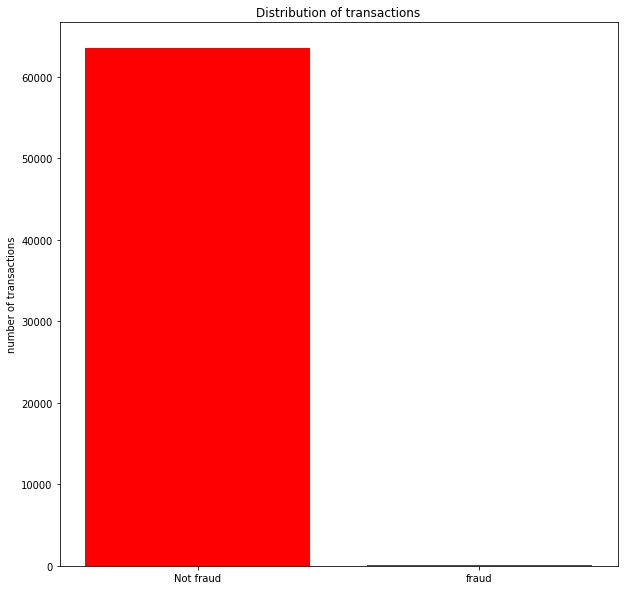

In [9]:
# getting the number of fraud transactions
fraud_count  = data['isFraud'].value_counts()
print(fraud_count)

# plot for fraud vs non-fraud transactions
fraud_plot = plt.figure(figsize=(10,10))
plt.bar(['Not fraud','fraud'],fraud_count.values/100,color="red")
plt.title('Distribution of transactions')
plt.ylabel('number of transactions')
plt.show()

We can see that the data is biased towards non fraudulent transactions. So we perform resampling in the data to create a balance in the data    

In [10]:
# Transaction type in fraud transactions
fraud_count_type = data[data['isFraud'] == 1]['type'].value_counts()
print(fraud_count_type)

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


The fraud samples are present in the  types 'CASH_OUT', 'TRANSFER' but other transaction types do not contain any fraudulent transactions.

In [11]:
transaction_fraud = []
for t in ['CASH_OUT','TRANSFER']:
    try:
        transaction_fraud.append(fraud_count_type[t])
    except:
        transaction_fraud.append(0)

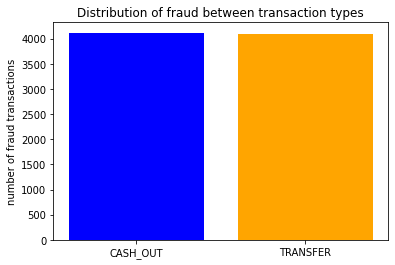

In [12]:
transaction_fraud_plot = plt.figure()
plt.bar(['CASH_OUT', 'TRANSFER'],transaction_fraud, color = ['blue','orange'])
plt.title('Distribution of fraud between transaction types')
plt.ylabel('number of fraud transactions')
plt.show()

The fraudulent transactions are equally distributed amongst 'CASH_OUT', 'TRANSFER' types. So we have to train our prediction ML model to look out for transactions with such data types , and carry on prediction only if it is either 'CASH_OUT' or 'TRANSFER' data type.

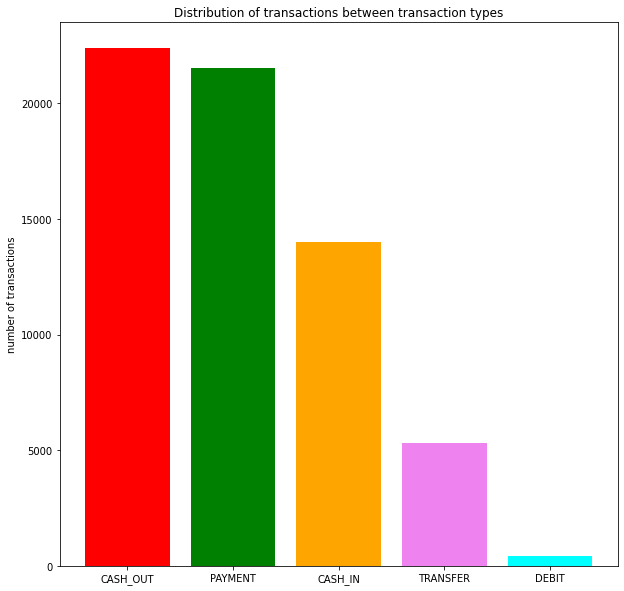

In [13]:
# Distribuion of transactions on its types
dist_plot = plt.figure(figsize=(10,10))
plt.bar(data['type'].value_counts().index,data['type'].value_counts().values/100, color = ['red','green','orange','violet','cyan'])
plt.title('Distribution of transactions between transaction types')
plt.ylabel('number of transactions')
plt.show()

From the above visualization, we come to the conclusion that CASH_OUT type has the most number of transactions, and DEBIT type has the least number of transactions

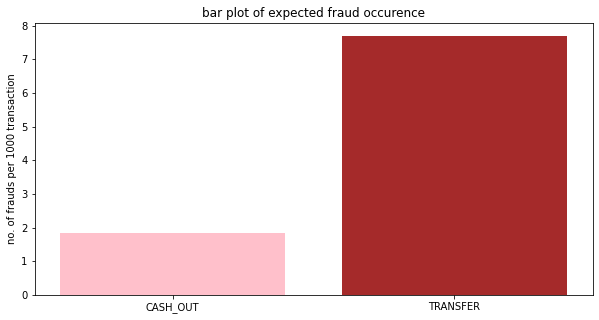

In [14]:
# Finding the fraud occurence plot for CASH_OUT vs TRANSFER
fraud_occurence = plt.figure(figsize=(10,5))
plt.bar((fraud_count_type/data['type'].value_counts()[['CASH_OUT','TRANSFER']]).index,(fraud_count_type/data['type'].value_counts()[['CASH_OUT','TRANSFER']]).values*1000, color = ['pink','brown'])
plt.title('bar plot of expected fraud occurence')
plt.ylabel('no. of frauds per 1000 transaction')
plt.show()

In [15]:
# importing necessary libraries for model training 

from sklearn import preprocessing
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings



In [16]:
# Creating a data model using CASH_OUT and TRANSFER types because from our previous analysis, these two types consist all the fraudulent transactions
model_info = data[(data['type'] == 'CASH_OUT') | (data['type'] == 'TRANSFER')]
model_info = model_info.drop(['nameOrig','nameDest'],axis = 1)
model_info['type'].replace('TRANSFER', 0, inplace = True)
model_info['type'].replace('CASH_OUT', 1, inplace = True)

In [17]:
# defining dependent and non-dependent variables
Y = model_info['isFraud']
X = model_info.drop(['isFraud'],axis = 1)

In [18]:
# Using SMOTE to perform resampling in our data
x_resample, y_resample = SMOTE().fit_resample(X, Y.values.ravel())

In [19]:
#Splitting the dataset into train(90% of total) and test dataset(10% of total).
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.1, random_state = 0)

# SELECTING MODELS
Now we would be using different algorithms for training models, using the above data split, and check accuracy for each one

In [20]:
# To get prediction scores nd information
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

In [21]:
# DECISION TREE

from sklearn import tree

#Creating a decision tree model
model = tree.DecisionTreeClassifier()
#Training the model using train dataset
model.fit(x_train, y_train)
y_pred = model.predict(x_test) 

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))


KeyboardInterrupt: 

In [ ]:
# REGRESSION MODEL -LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression


#Creating a logistic regression model
model = LogisticRegression()
#Training the model using train dataset
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))
# print(classification_report(y_test,y_pred))


Accuracy in % =  92.91054232133806
Precision Score in %: 88.39647212601946
Confusion matrix 
 [[245684  31293]
 [  7872 267591]]
classification report 
 :               precision    recall  f1-score   support

           0       0.97      0.89      0.93    276977
           1       0.90      0.97      0.93    275463

    accuracy                           0.93    552440
   macro avg       0.93      0.93      0.93    552440
weighted avg       0.93      0.93      0.93    552440



In [ ]:
# NEURAL NETWORKS

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#Creating a MLP model
model = MLPClassifier([5,20,5])
#Training the model using train dataset
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))
# print(classification_report(y_test,y_pred))

C:\Users\Bhavya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy in % =  95.53055535442763
Precision Score in %: 91.97400143492993
Confusion matrix 
 [[253855  23122]
 [  1569 273894]]
classification report 
 :               precision    recall  f1-score   support

           0       0.99      0.92      0.95    276977
           1       0.92      0.99      0.96    275463

    accuracy                           0.96    552440
   macro avg       0.96      0.96      0.96    552440
weighted avg       0.96      0.96      0.96    552440



In [ ]:
# NAIVE BAYES
 
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
#Training the model using train dataset
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))

Accuracy in % =  71.98845123452321
Precision Score in %: 70.84672638628693
Confusion matrix 
 [[270976   6001]
 [148746 126717]]
classification report 
 :               precision    recall  f1-score   support

           0       0.65      0.98      0.78    276977
           1       0.95      0.46      0.62    275463

    accuracy                           0.72    552440
   macro avg       0.80      0.72      0.70    552440
weighted avg       0.80      0.72      0.70    552440



In [ ]:
# K NEAREST NEIGHBOUR (KNN)

from sklearn.neighbors import KNeighborsClassifier

#Creating a KNN model
model = KNeighborsClassifier(n_neighbors=3)
#Training the model using train dataset
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))

Accuracy in % =  99.62312649337484
Precision Score in %: 99.28044590367263
Confusion matrix 
 [[275069   1908]
 [   174 275289]]
classification report 
 :               precision    recall  f1-score   support

           0       1.00      0.99      1.00    276977
           1       0.99      1.00      1.00    275463

    accuracy                           1.00    552440
   macro avg       1.00      1.00      1.00    552440
weighted avg       1.00      1.00      1.00    552440



In [ ]:
# SUPPORT VECTOR MACHINE

from sklearn import svm

#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
#Training the model using train dataset
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))

Error: Canceled future for execute_request message before replies were done

In [25]:
import xgboost as xgb

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
#Training the model using train dataset
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

#Testing the accuracy of the model by feeding in the test dataset.
accuracy= model.score(x_test, y_test)
print("Accuracy in % = ",  accuracy*100)
print('Precision Score in %: {}'.format(average_precision_score(y_test,y_pred)*100))
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('classification report \n : {}'.format(classification_report(y_test,y_pred)))

Accuracy in % =  99.79762508145681
Precision Score in %: 99.64360008081817
Confusion matrix 
 [[276127    850]
 [   268 275195]]
classification report 
 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00    276977
           1       1.00      1.00      1.00    275463

    accuracy                           1.00    552440
   macro avg       1.00      1.00      1.00    552440
weighted avg       1.00      1.00      1.00    552440



  Using cached xgboost-1.6.0-py3-none-win_amd64.whl (126.1 MB)
Note: you may need to restart the kernel to use updated packages.
